# Summary:

1. Problem statement 
2. Business goal 
3. Steps to be followed in this exercise


### Boom Bikes (Sharing bikes) Problem Statement :

A bike-sharing system lets people rent bikes for short periods, often for a fee or even free of charge. Many of these systems allow users to borrow a bike from a computer-controlled "dock" where they can enter payment information to unlock a bike. Once finished, users can return the bike to any dock in the same system.

BoomBikes, a bike-sharing provider in the U.S., has recently faced a major revenue decline due to the COVID-19 pandemic. The current market conditions have made it tough for the company to stay afloat. In response, BoomBikes has decided to develop a well-thought-out business plan to boost revenue as soon as lockdown restrictions are lifted, and the economy begins to recover.

To be prepared for the expected demand once life returns to normal, BoomBikes is eager to understand the potential demand for shared bikes after quarantine ends. By understanding these needs, the company aims to not only meet customer demand but also gain a competitive edge in the market and boost profits.

To gain this insight, BoomBikes has hired a consulting firm to identify the key factors that influence the demand for shared bikes in the U.S. market. The main goals are to determine:

Which factors play a significant role in predicting bike demand.
How accurately these factors can explain shifts in daily demand.
BoomBikes has collected an extensive dataset on daily bike demand across the U.S., drawing on weather data and lifestyle trends. This analysis will provide the company with insights to better serve their customers and thrive in the evolving market.

### Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



### The steps to be followed in this exercise are as follows:

1) Reading, understanding and visualizing the data

2) Preparing the data for model training (train-test split, rescaling)

3) Training the model

4) Residual analysis

5) Prediction and evaluation of the test set

#### Step 1: Reading and Understanding of data

    1. Importing the required libraries
    2. Understanding the structure of the data

In [6]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
#importing the required libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [8]:
# Reading data from the day csv file

df= pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dataset characteristics	

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [10]:
df.shape

(730, 16)

In [11]:
# information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Checking for missing values across dataframe

100 * df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
df['dteday']= pd.to_datetime(df['dteday'], dayfirst=True)
df['dteday'].dtypes

dtype('<M8[ns]')

In [15]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [16]:
# Since season, weekday and weathesit are basically categorical values, converting them to string type for future use
df[['season','weekday','weathersit']] = df[['season','weekday','weathersit']].astype(str)

In [17]:
# Converting the weather variable into more understanable text
df['weathersit'].replace(['1','2','3','4'],['Good', 'Average', 'Bad', 'Very Bad'], inplace=True)

In [18]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [19]:
# Converting the seasons into specific season names for better understanding
df['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
# Converting the dtedat to Date Time
df['dteday'] = pd.to_datetime(df['dteday'], format="%d-%m-%Y")
df['dteday'].dtypes

dtype('<M8[ns]')

### Visualization of data

#### Univariate Analysis

In [24]:
num_cols = ["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant']
cat_cols = ["season","mnth","weekday","weathersit","yr","workingday","holiday"]

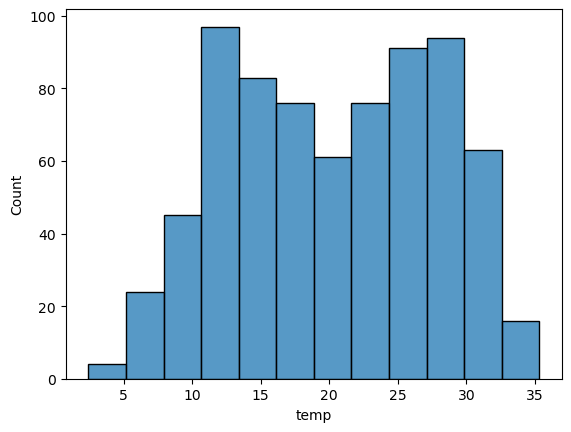

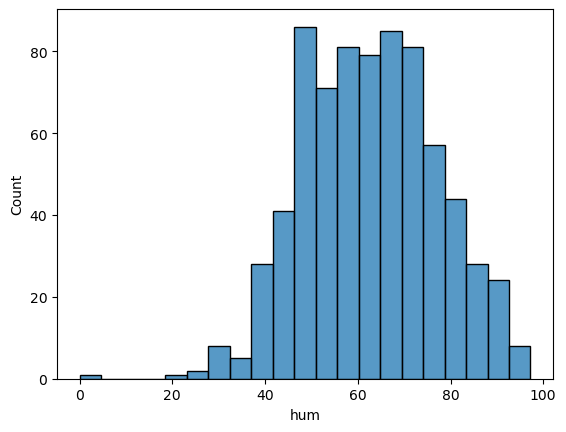

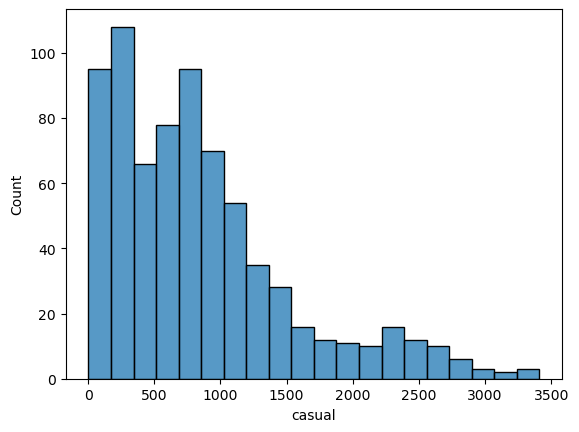

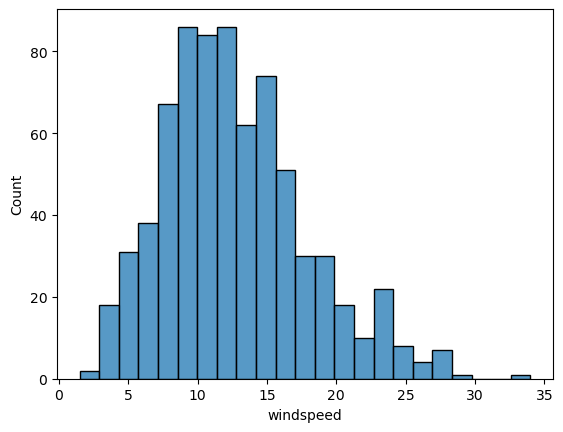

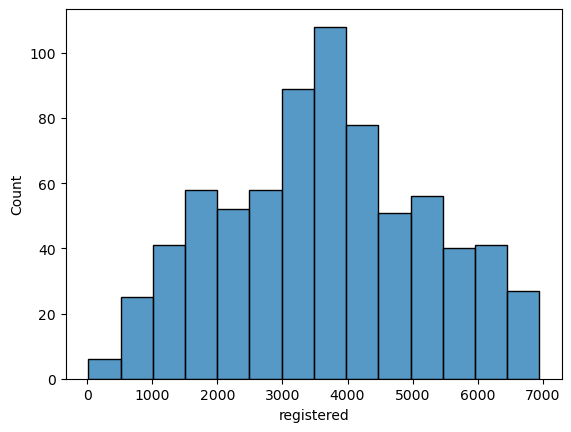

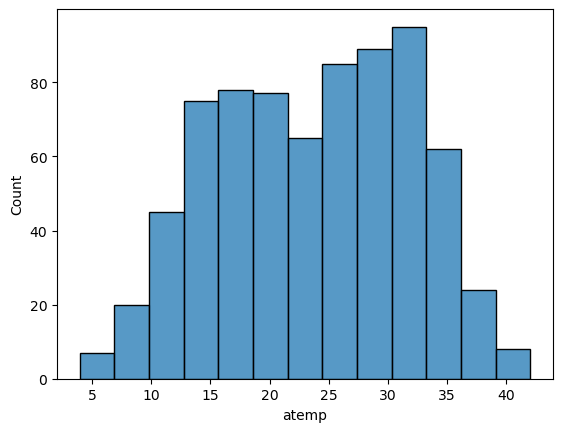

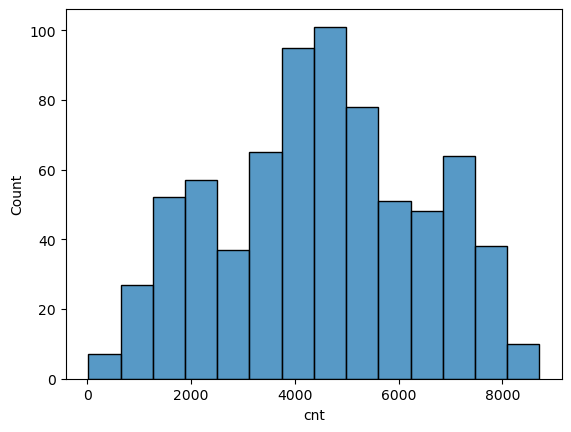

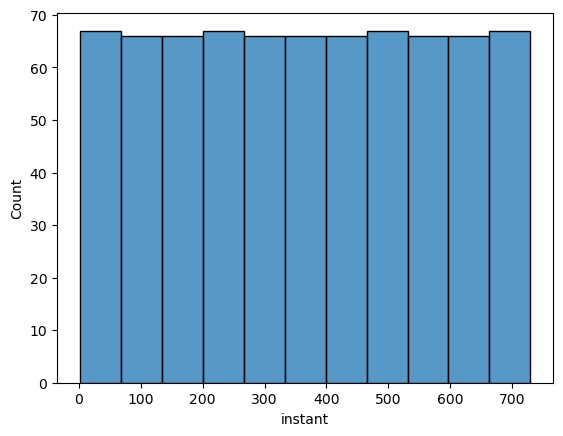

In [25]:
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

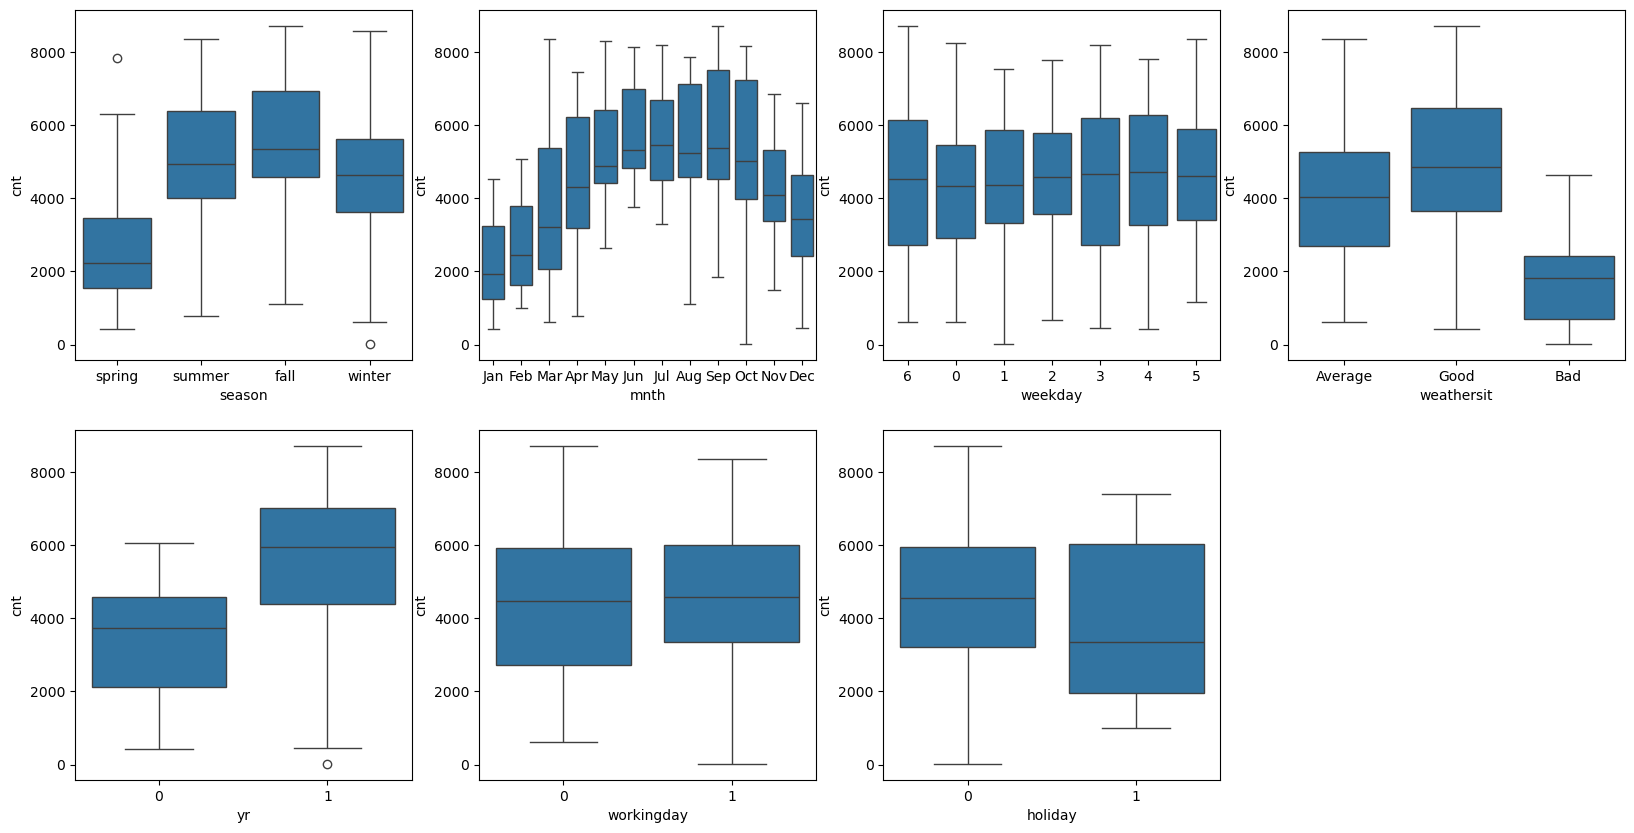

In [26]:
#visualizing the categorical variables of the dataset using boxplot 

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

#### Some of the observations from the plots

- The majority of bike rentals occur during the summer and fall seasons.

- September sees the highest bike rental rates, followed closely by October.

- Saturdays, Wednesdays, and Thursdays are the most popular days for bike rentals.

- Clear weather conditions correspond to the highest bike rental rates.

- Bike rentals were higher in 2019 compared to 2018.

- Rental rates show no significant difference between working days and non-working days.

- Bike rental rates are higher on holidays than on regular days.



### bivariate analysis

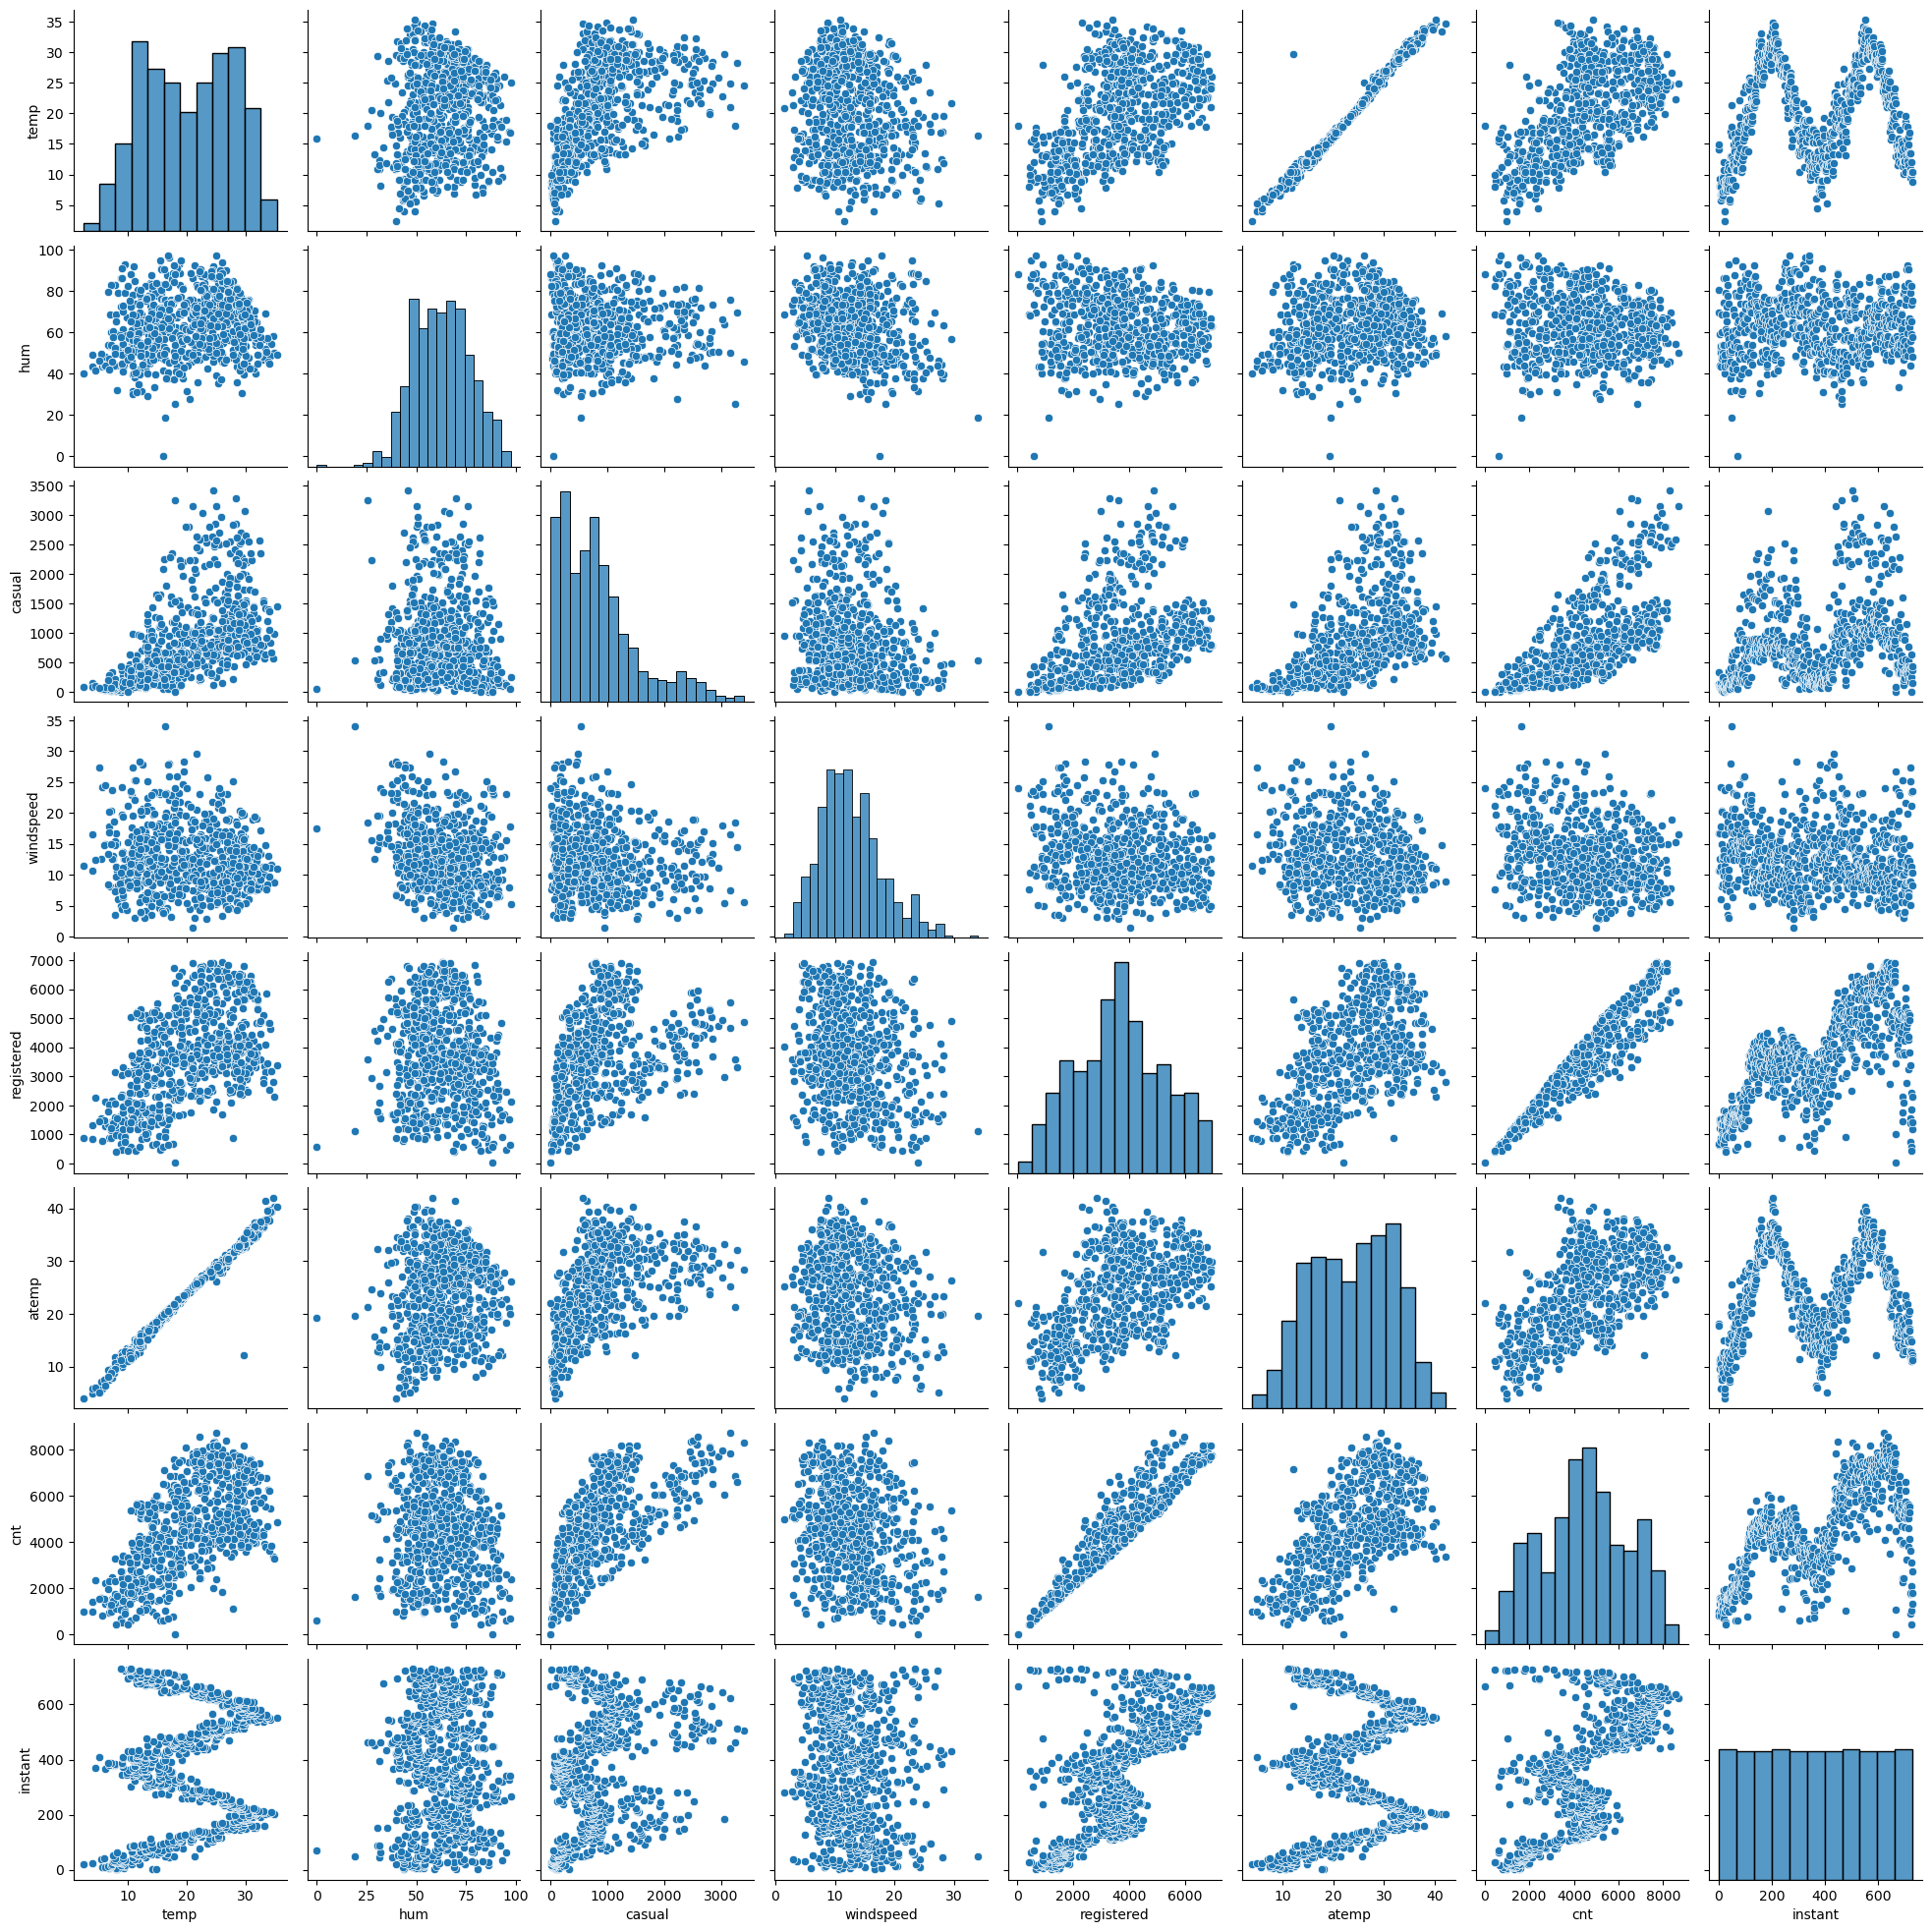

In [29]:
#visualizing the numeric variables of the dataset using pairplot

sns.pairplot(df, vars=num_cols)
plt.show()

### Obversations from pair plot:

The pair plots above shows that there is some sort of positive correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further. 



In [31]:
print("Unique values in season:", df['season'].unique())
print("Unique values in mnth:", df['mnth'].unique())
print("Unique values in weathersit:", df['weathersit'].unique())
print("Unique values in weekday:", df['weekday'].unique())

Unique values in season: ['spring' 'summer' 'fall' 'winter']
Unique values in mnth: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Unique values in weathersit: ['Average' 'Good' 'Bad']
Unique values in weekday: ['6' '0' '1' '2' '3' '4' '5']


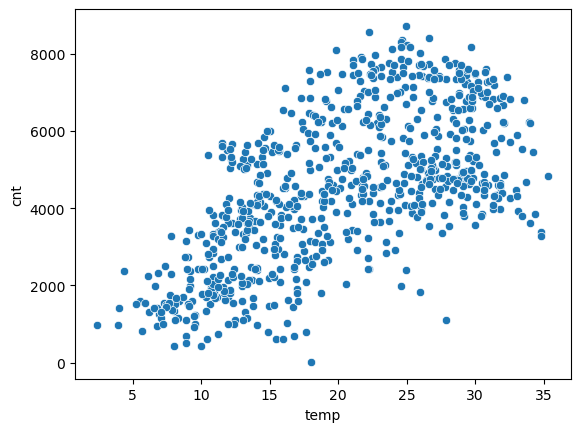

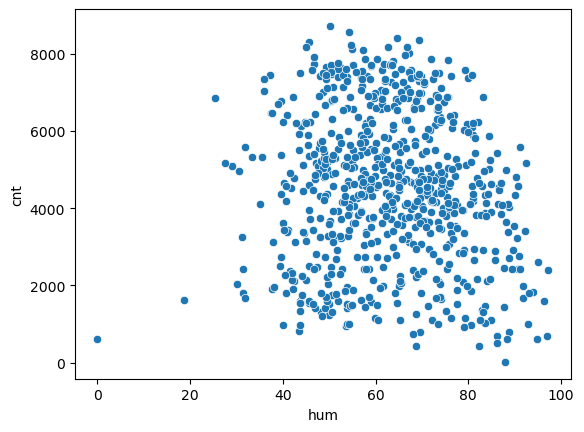

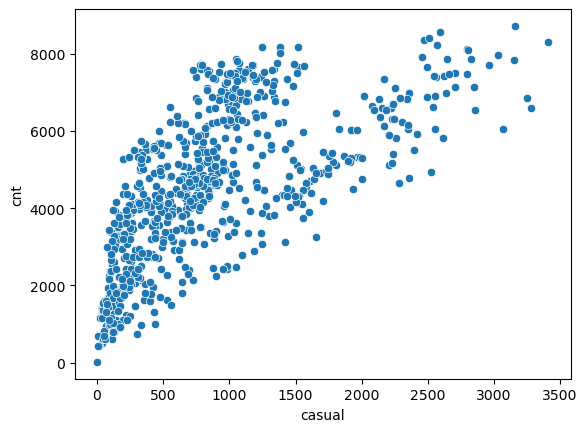

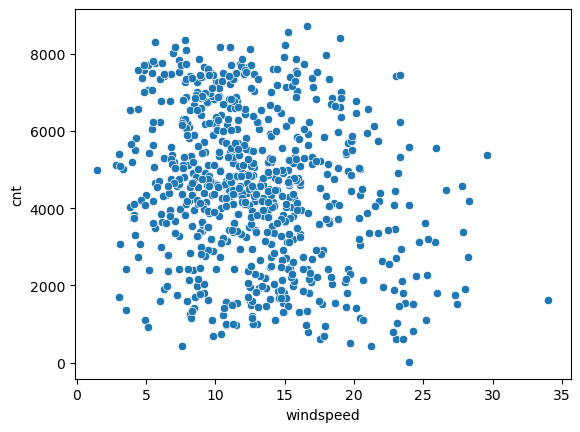

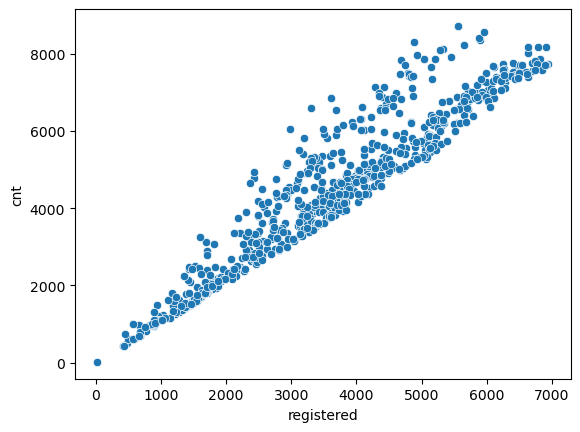

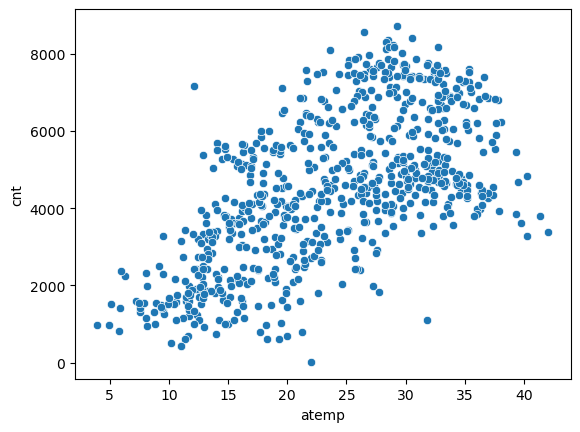

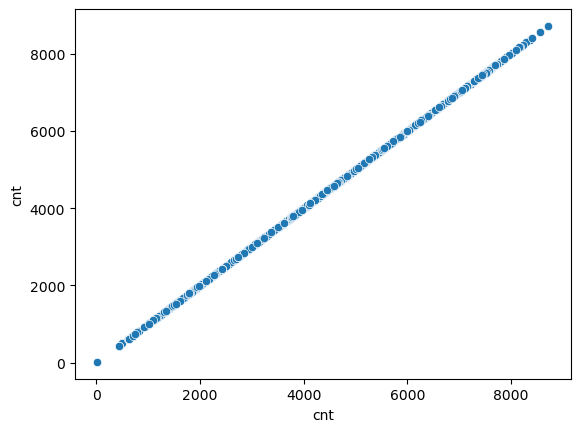

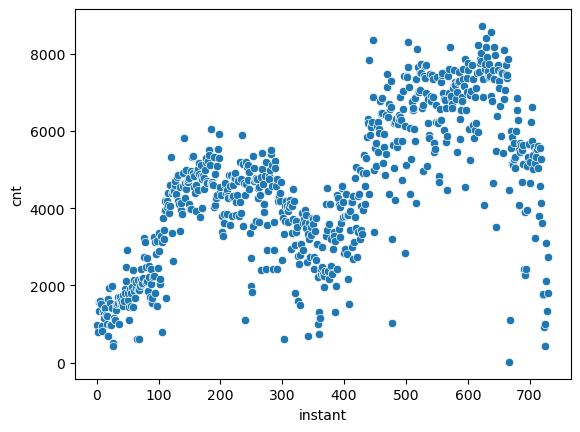

In [32]:
#visualizing the categorical variables of the dataset using boxplot 

for i in num_cols:
    sns.scatterplot(x=df[i],y=df['cnt'])
    plt.show()

## Multi variate analysis 

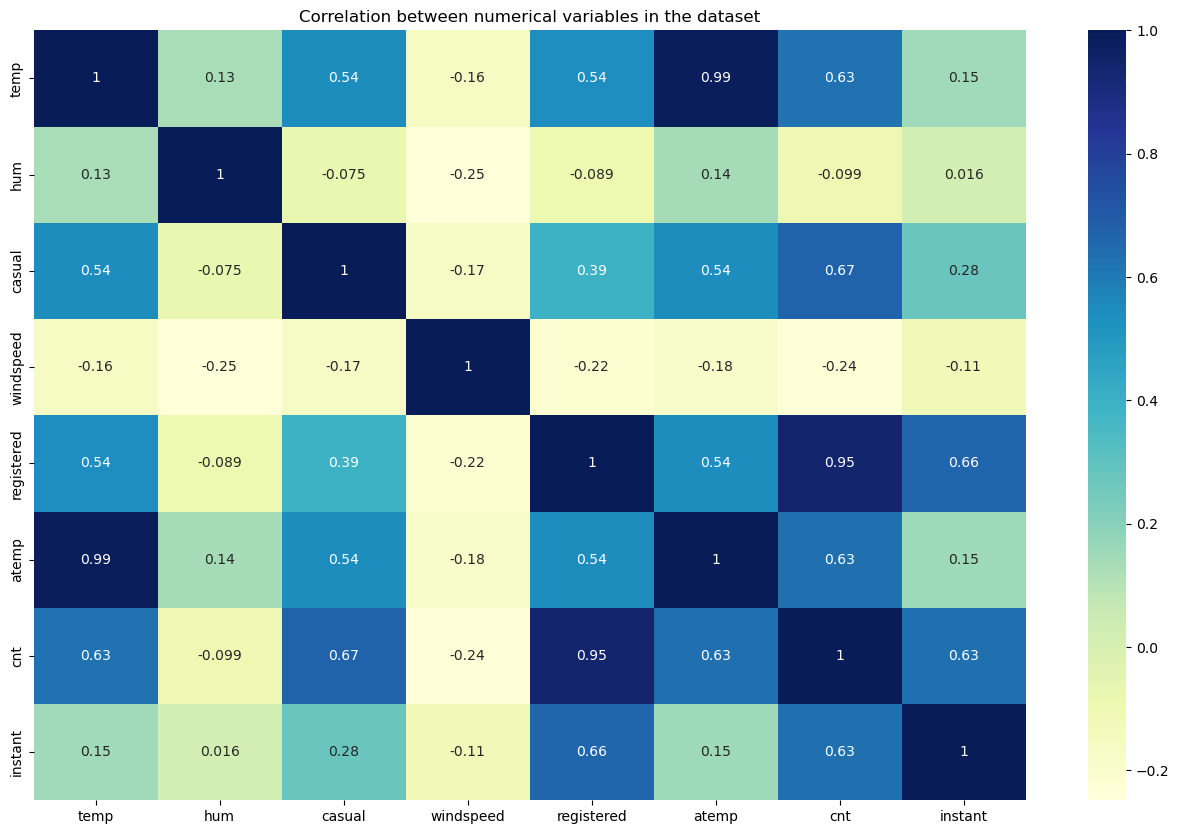

In [34]:
plt.figure(figsize = (16, 10))
sns.heatmap(df[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation between numerical variables in the dataset')
plt.show()

There are several variables correlated to count variable (cnt) 

Highly postive corelated
- registered
- casual
- temp
- atemp

we can use these parameters while conducting a linear regresssion model


### Dropping the un-required variables from the dataset 

- The variables atemp, instant, dteday, casual, registered can be dropped as they are not needed for the analysis 
- atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 


In [37]:

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,Average,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,Average,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,Good,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,Good,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,Good,9.305237,43.6957,12.522300,1600


In [38]:
df.shape

(730, 11)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [40]:
100 * df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64


### Creating Dummy Variables for Categorical Data
#### We need to create dummy variables for the following columns.
- season
- mnth
- weekday
- weathersit

In [42]:
month = pd.get_dummies(df.mnth, drop_first=True).astype(int)
weekday = pd.get_dummies(df.weekday, drop_first=True).astype(int)
weathersit = pd.get_dummies(df.weathersit, drop_first=True).astype(int)
season = pd.get_dummies(df.season, drop_first=True).astype(int)

In [43]:
weekday

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [44]:
#adding the dummy variables to the original dataframe

df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,2,3,4,5,6,Bad,Good,spring,summer,winter
0,spring,0,Jan,0,6,0,Average,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,1,0,0
1,spring,0,Jan,0,0,0,Average,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,1,0,0
2,spring,0,Jan,0,1,1,Good,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,0,2,1,Good,8.200000,59.0435,10.739832,...,1,0,0,0,0,0,1,1,0,0
4,spring,0,Jan,0,3,1,Good,9.305237,43.6957,12.522300,...,0,1,0,0,0,0,1,1,0,0


In [45]:
df.shape

(730, 33)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  Aug         730 non-null    int32  
 12  Dec         730 non-null    int32  
 13  Feb         730 non-null    int32  
 14  Jan         730 non-null    int32  
 15  Jul         730 non-null    int32  
 16  Jun         730 non-null    int32  
 17  Mar         730 non-null    int32  
 18  May         730 non-null    int32  
 19  Nov         730 non-null    i

In [47]:
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,2,3,4,5,6,Bad,Good,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [48]:
# Moving the cnt to the end for easier identification
first_col = df.pop('cnt')
df['cnt'] = first_col

### Step 2: Preparing the data for model training (train-test split, rescaling)

In [50]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [51]:
print('Shape of the Train data is:' , df_train.shape)
print('Shape of the Test data is:' , df_test.shape)

Shape of the Train data is: (510, 29)
Shape of the Test data is: (220, 29)


In [52]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,Bad,Good,spring,summer,winter,cnt
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,7216
426,1,0,0,16.980847,62.1250,10.792293,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,4066
728,1,0,0,10.489153,48.3333,23.500518,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1796
482,1,0,0,15.443347,48.9583,8.708325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4220
111,0,0,1,13.803347,72.9583,14.707907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1683


With all categorical values now encoded, we can proceed to scale the numeric data.

### Scaling

In [55]:
# MinMax scaling


scaler = MinMaxScaler()
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

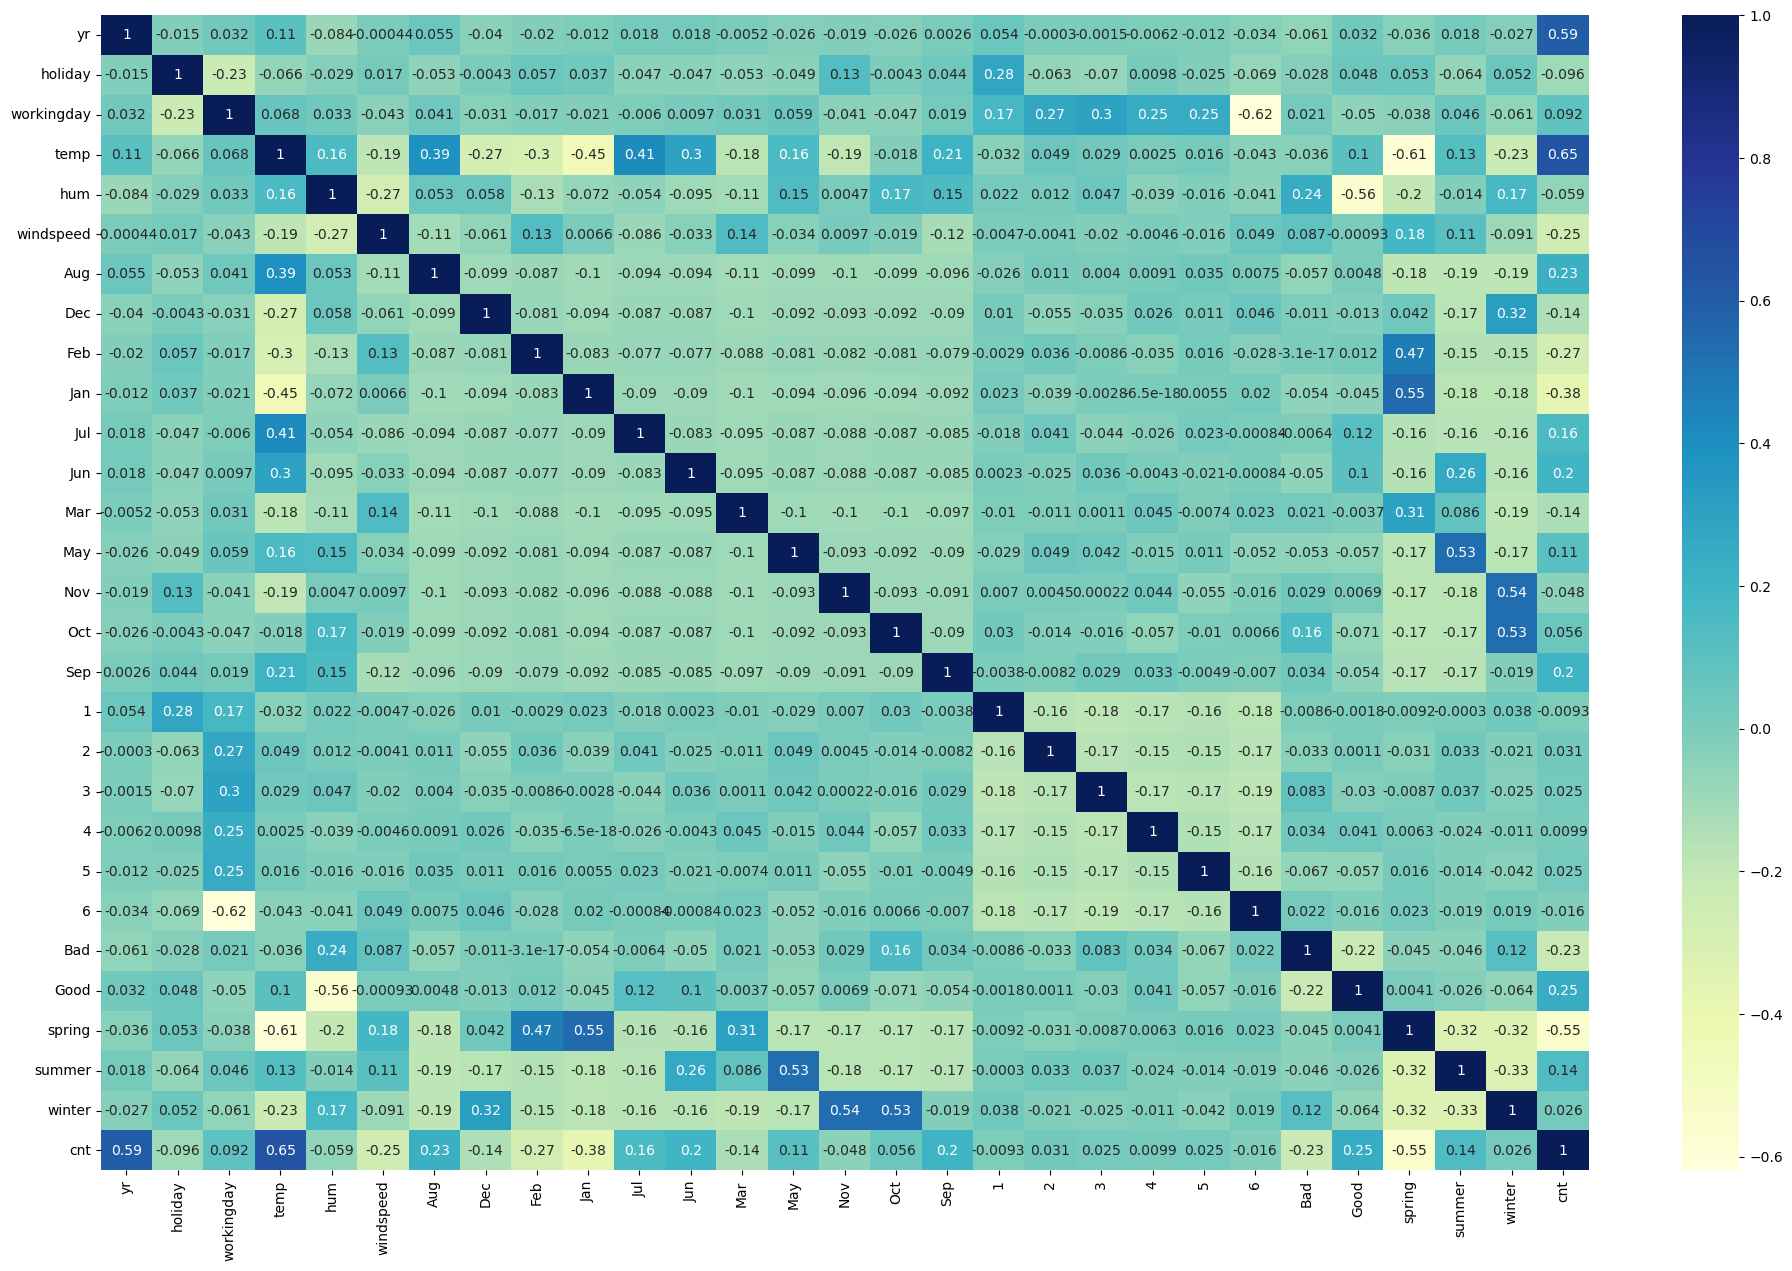

In [56]:
# Corelation between variables using heatmap

plt.figure(figsize=(24,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

### Step 3:  Training the model

With 29 columns, which is a manageable number, we'll start by building a model that includes all variables. We’ll then iteratively remove columns based on statistical significance and collinearity. We’ll stop once there’s no further improvement in the R² value, or when all remaining variables are statistically significant with low VIF.

There will be several iterations to refine the model, so thank you for your patience!

In [58]:
y_train = df_train.pop('cnt')
X_train = df_train

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)
lr_model_0 = lr.fit()
lr_model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          3.00e-181
Time:                        11:30:13   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2249      0.047      4.762      0.000       0.132       0.318
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday       -0.0423      0.024     -1.792      0.074      -0.089       0.004
workingday     0.0438      0.009      4.680      0.000       0.025       0.062
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug            0.0204      0.034      0.607      0.544      -0.046       0.086
Dec           -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb           -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan           -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul           -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun            0.0046      0.025      0.186      0.853      -0.044       0.053
Mar            0.0013      0.025      0.052      0.959      -0.047       0.050
May            0.0247      0.021      1.173      0.241      -0.017       0.066
Nov           -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct            0.0075      0.036      0.210      0.834      -0.063       0.078
Sep            0.0859      0.032      2.692      0.007       0.023       0.149
1             -0.0099      0.010     -1.021      0.308      -0.029       0.009
2             -0.0069      0.011     -0.621      0.535      -0.029       0.015
3              0.0055      0.011      0.524      0.600      -0.015       0.026
4              0.0019      0.011      0.172      0.864      -0.020       0.023
5              0.0110      0.011      0.987      0.324      -0.011       0.033
6              0.0542      0.015      3.732      0.000       0.026       0.083
Bad           -0.1963      0.025     -7.850      0.000      -0.245      -0.147
Good           0.0596      0.010      5.709      0.000       0.039       0.080
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [59]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
21,5,inf
20,4,inf
19,3,inf
18,2,inf
17,1,inf
3,temp,40.30
4,hum,33.65
25,spring,12.10


The R-squared is a substantial 85%, but the model still contains some insignificant variables and variables with high multicollinearity. To address this, we will refine the model iteratively. First, we will remove columns with high p-values. Once p-values are acceptable across all columns, we will examine the VIFs and remove variables with high multicollinearity as needed. This process will continue until we build a robust model.

In [61]:
# Removing 'mnth_Mar' due to high P-Value

X = X_train.drop('Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.87e-182
Time:                        11:30:13   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.045      5.048      0.000       0.138       0.314
yr             0.2324      0.008     28.848      0.000       0.217       0.248
holiday       -0.0423      0.024     -1.793      0.074      -0.089       0.004
workingday     0.0439      0.009      4.693      0.000       0.025       0.062
temp           0.4450      0.046      9.763      0.000       0.355       0.535
hum           -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed     -0.1861      0.026     -7.245      0.000      -0.237      -0.136
Aug            0.0198      0.032      0.627      0.531      -0.042       0.082
Dec           -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb           -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Jul           -0.0344      0.033     -1.035      0.301      -0.100       0.031
Jun            0.0042      0.023      0.179      0.858      -0.042       0.050
May            0.0243      0.020      1.235      0.218      -0.014       0.063
Nov           -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct            0.0066      0.031      0.215      0.830      -0.054       0.067
Sep            0.0852      0.029      2.945      0.003       0.028       0.142
1             -0.0099      0.010     -1.021      0.308      -0.029       0.009
2             -0.0069      0.011     -0.622      0.534      -0.029       0.015
3              0.0055      0.011      0.525      0.600      -0.015       0.026
4              0.0019      0.011      0.175      0.861      -0.020       0.023
5              0.0110      0.011      0.988      0.324      -0.011       0.033
6              0.0542      0.015      3.740      0.000       0.026       0.083
Bad           -0.1963      0.025     -7.858      0.000      -0.245      -0.147
Good           0.0596      0.010      5.716      0.000       0.039       0.080
spring        -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer         0.0427      0.026      1.668      0.096      -0.008       0.093
winter         0.1079      0.027      3.934      0.000       0.054       0.162
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate

In [62]:
# Removing weekday dummy column '4' due to high P-Value

X = X.drop('4',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_2 = lr.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.87e-182
Time:                        11:30:13   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.045      5.048      0.000       0.138       0.314
yr             0.2324      0.008     28.848      0.000       0.217       0.248
holiday       -0.0404      0.030     -1.347      0.179      -0.099       0.019
workingday     0.0458      0.015      3.029      0.003       0.016       0.075
temp           0.4450      0.046      9.763      0.000       0.355       0.535
hum           -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed     -0.1861      0.026     -7.245      0.000      -0.237      -0.136
Aug            0.0198      0.032      0.627      0.531      -0.042       0.082
Dec           -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb           -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Jul           -0.0344      0.033     -1.035      0.301      -0.100       0.031
Jun            0.0042      0.023      0.179      0.858      -0.042       0.050
May            0.0243      0.020      1.235      0.218      -0.014       0.063
Nov           -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct            0.0066      0.031      0.215      0.830      -0.054       0.067
Sep            0.0852      0.029      2.945      0.003       0.028       0.142
1             -0.0118      0.015     -0.783      0.434      -0.042       0.018
2             -0.0088      0.015     -0.574      0.566      -0.039       0.021
3              0.0036      0.015      0.246      0.806      -0.025       0.032
5              0.0091      0.016      0.587      0.558      -0.021       0.040
6              0.0542      0.015      3.740      0.000       0.026       0.083
Bad           -0.1963      0.025     -7.858      0.000      -0.245      -0.147
Good           0.0596      0.010      5.716      0.000       0.039       0.080
spring        -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer         0.0427      0.026      1.668      0.096      -0.008       0.093
winter         0.1079      0.027      3.934      0.000       0.054       0.162
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
21,5,inf
20,4,inf
19,3,inf
18,2,inf
17,1,inf
3,temp,40.30
4,hum,33.65
25,spring,12.10


In [64]:
# Removing 'Oct' due to high P-Value
X = X.drop('Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_3 = lr.fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.74e-183
Time:                        11:30:14   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2273      0.044      5.170      0.000       0.141       0.314
yr             0.2324      0.008     28.897      0.000       0.217       0.248
holiday       -0.0401      0.030     -1.339      0.181      -0.099       0.019
workingday     0.0456      0.015      3.027      0.003       0.016       0.075
temp           0.4455      0.045      9.802      0.000       0.356       0.535
hum           -0.1505      0.038     -3.943      0.000      -0.226      -0.076
windspeed     -0.1859      0.026     -7.249      0.000      -0.236      -0.135
Aug            0.0172      0.029      0.590      0.555      -0.040       0.074
Dec           -0.0493      0.018     -2.678      0.008      -0.085      -0.013
Feb           -0.0348      0.022     -1.603      0.110      -0.077       0.008
Jan           -0.0656      0.022     -3.011      0.003      -0.108      -0.023
Jul           -0.0370      0.031     -1.201      0.230      -0.098       0.024
Jun            0.0030      0.023      0.131      0.896      -0.042       0.048
May            0.0238      0.020      1.219      0.223      -0.015       0.062
Nov           -0.0461      0.019     -2.422      0.016      -0.083      -0.009
Sep            0.0820      0.025      3.318      0.001       0.033       0.131
1             -0.0119      0.015     -0.785      0.433      -0.042       0.018
2             -0.0088      0.015     -0.575      0.566      -0.039       0.021
3              0.0036      0.015      0.248      0.804      -0.025       0.032
5              0.0091      0.015      0.590      0.556      -0.021       0.040
6              0.0542      0.014      3.741      0.000       0.026       0.083
Bad           -0.1961      0.025     -7.864      0.000      -0.245      -0.147
Good           0.0596      0.010      5.729      0.000       0.039       0.080
spring        -0.0456      0.028     -1.643      0.101      -0.100       0.009
summer         0.0406      0.024      1.717      0.087      -0.006       0.087
winter         0.1107      0.024      4.569      0.000       0.063       0.158
==============================================================================
Omnibus:                       82.911   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.194
Skew:                          -0.793   Prob(JB):                     2.81e-50
Kurtosis:                       5.867   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Removing 'Jun' due to high P-Value
X = X.drop('Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_4 = lr.fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.53e-184
Time:                        11:30:14   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2277      0.044      5.194      0.000       0.142       0.314
yr             0.2323      0.008     29.032      0.000       0.217       0.248
holiday       -0.0404      0.030     -1.356      0.176      -0.099       0.018
workingday     0.0456      0.015      3.027      0.003       0.016       0.075
temp           0.4487      0.038     11.669      0.000       0.373       0.524
hum           -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed     -0.1862      0.025     -7.313      0.000      -0.236      -0.136
Aug            0.0150      0.024      0.633      0.527      -0.031       0.061
Dec           -0.0490      0.018     -2.689      0.007      -0.085      -0.013
Feb           -0.0344      0.021     -1.602      0.110      -0.077       0.008
Jan           -0.0650      0.021     -3.059      0.002      -0.107      -0.023
Jul           -0.0395      0.025     -1.600      0.110      -0.088       0.009
May            0.0226      0.017      1.307      0.192      -0.011       0.057
Nov           -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep            0.0804      0.021      3.748      0.000       0.038       0.123
1             -0.0118      0.015     -0.782      0.435      -0.041       0.018
2             -0.0088      0.015     -0.575      0.565      -0.039       0.021
3              0.0037      0.015      0.253      0.801      -0.025       0.032
5              0.0092      0.015      0.591      0.555      -0.021       0.040
6              0.0542      0.014      3.746      0.000       0.026       0.083
Bad           -0.1961      0.025     -7.874      0.000      -0.245      -0.147
Good           0.0595      0.010      5.737      0.000       0.039       0.080
spring        -0.0466      0.027     -1.747      0.081      -0.099       0.006
summer         0.0401      0.023      1.722      0.086      -0.006       0.086
winter         0.1096      0.023      4.826      0.000       0.065       0.154
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Removing weekday dummy column '3' due to high P-Value
X = X.drop('3',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_5 = lr.fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.34e-185
Time:                        11:30:14   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2274      0.044      5.194      0.000       0.141       0.313
yr             0.2323      0.008     29.061      0.000       0.217       0.248
holiday       -0.0387      0.029     -1.335      0.183      -0.096       0.018
workingday     0.0476      0.013      3.728      0.000       0.023       0.073
temp           0.4489      0.038     11.686      0.000       0.373       0.524
hum           -0.1510      0.038     -4.002      0.000      -0.225      -0.077
windspeed     -0.1863      0.025     -7.322      0.000      -0.236      -0.136
Aug            0.0150      0.024      0.635      0.525      -0.031       0.061
Dec           -0.0491      0.018     -2.701      0.007      -0.085      -0.013
Feb           -0.0342      0.021     -1.597      0.111      -0.076       0.008
Jan           -0.0650      0.021     -3.060      0.002      -0.107      -0.023
Jul           -0.0394      0.025     -1.600      0.110      -0.088       0.009
May            0.0227      0.017      1.310      0.191      -0.011       0.057
Nov           -0.0460      0.019     -2.431      0.015      -0.083      -0.009
Sep            0.0804      0.021      3.752      0.000       0.038       0.123
1             -0.0138      0.013     -1.069      0.286      -0.039       0.012
2             -0.0109      0.013     -0.830      0.407      -0.037       0.015
5              0.0071      0.013      0.538      0.591      -0.019       0.033
6              0.0542      0.014      3.750      0.000       0.026       0.083
Bad           -0.1960      0.025     -7.879      0.000      -0.245      -0.147
Good           0.0595      0.010      5.739      0.000       0.039       0.080
spring        -0.0465      0.027     -1.745      0.082      -0.099       0.006
summer         0.0403      0.023      1.731      0.084      -0.005       0.086
winter         0.1097      0.023      4.841      0.000       0.065       0.154
==============================================================================
Omnibus:                       83.044   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.832
Skew:                          -0.795   Prob(JB):                     3.36e-50
Kurtosis:                       5.862   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Removing weekday dummy column '5' due to high P-Value
X = X.drop('5',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_6 = lr.fit()
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.36e-186
Time:                        11:30:14   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2284      0.044      5.227      0.000       0.143       0.314
yr             0.2322      0.008     29.077      0.000       0.217       0.248
holiday       -0.0363      0.029     -1.268      0.205      -0.092       0.020
workingday     0.0498      0.012      4.116      0.000       0.026       0.074
temp           0.4484      0.038     11.686      0.000       0.373       0.524
hum           -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed     -0.1863      0.025     -7.327      0.000      -0.236      -0.136
Aug            0.0152      0.024      0.645      0.520      -0.031       0.062
Dec           -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Feb           -0.0340      0.021     -1.590      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.066      0.002      -0.107      -0.023
Jul           -0.0389      0.025     -1.583      0.114      -0.087       0.009
May            0.0228      0.017      1.317      0.188      -0.011       0.057
Nov           -0.0466      0.019     -2.472      0.014      -0.084      -0.010
Sep            0.0803      0.021      3.747      0.000       0.038       0.122
1             -0.0160      0.012     -1.310      0.191      -0.040       0.008
2             -0.0131      0.012     -1.052      0.293      -0.037       0.011
6              0.0542      0.014      3.752      0.000       0.026       0.083
Bad           -0.1974      0.025     -7.983      0.000      -0.246      -0.149
Good           0.0591      0.010      5.719      0.000       0.039       0.079
spring        -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer         0.0401      0.023      1.726      0.085      -0.006       0.086
winter         0.1099      0.023      4.851      0.000       0.065       0.154
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Removing 'Aug' due to high P-Value
X = X.drop('Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_7 = lr.fit()
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.47e-187
Time:                        11:30:14   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2370      0.042      5.700      0.000       0.155       0.319
yr             0.2324      0.008     29.128      0.000       0.217       0.248
holiday       -0.0364      0.029     -1.275      0.203      -0.093       0.020
workingday     0.0499      0.012      4.130      0.000       0.026       0.074
temp           0.4502      0.038     11.769      0.000       0.375       0.525
hum           -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed     -0.1864      0.025     -7.338      0.000      -0.236      -0.137
Dec           -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Feb           -0.0340      0.021     -1.591      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May            0.0224      0.017      1.299      0.195      -0.012       0.056
Nov           -0.0476      0.019     -2.534      0.012      -0.085      -0.011
Sep            0.0716      0.017      4.303      0.000       0.039       0.104
1             -0.0160      0.012     -1.317      0.188      -0.040       0.008
2             -0.0129      0.012     -1.040      0.299      -0.037       0.011
6              0.0547      0.014      3.790      0.000       0.026       0.083
Bad           -0.1985      0.025     -8.049      0.000      -0.247      -0.150
Good           0.0588      0.010      5.703      0.000       0.039       0.079
spring        -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer         0.0298      0.017      1.766      0.078      -0.003       0.063
winter         0.1009      0.018      5.663      0.000       0.066       0.136
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Removing weekday dummy column '2' due to high P-Value
X = X.drop('2',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_8 = lr.fit()
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          3.51e-188
Time:                        11:30:14   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2383      0.042      5.732      0.000       0.157       0.320
yr             0.2323      0.008     29.122      0.000       0.217       0.248
holiday       -0.0389      0.029     -1.364      0.173      -0.095       0.017
workingday     0.0467      0.012      3.996      0.000       0.024       0.070
temp           0.4505      0.038     11.777      0.000       0.375       0.526
hum           -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed     -0.1869      0.025     -7.358      0.000      -0.237      -0.137
Dec           -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb           -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan           -0.0649      0.021     -3.062      0.002      -0.107      -0.023
Jul           -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May            0.0222      0.017      1.285      0.199      -0.012       0.056
Nov           -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep            0.0718      0.017      4.314      0.000       0.039       0.104
1             -0.0130      0.012     -1.102      0.271      -0.036       0.010
6              0.0545      0.014      3.779      0.000       0.026       0.083
Bad           -0.1971      0.025     -8.005      0.000      -0.246      -0.149
Good           0.0586      0.010      5.683      0.000       0.038       0.079
spring        -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer         0.0296      0.017      1.751      0.081      -0.004       0.063
winter         0.1004      0.018      5.639      0.000       0.065       0.135
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Removing weekday dummy column '1' due to high P-Value
X = X.drop('1',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_9 = lr.fit()
lr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          5.20e-189
Time:                        11:30:14   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2387      0.042      5.740      0.000       0.157       0.320
yr             0.2318      0.008     29.103      0.000       0.216       0.247
holiday       -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday     0.0441      0.011      3.852      0.000       0.022       0.067
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
Dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
Nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep            0.0723      0.017      4.349      0.000       0.040       0.105
6              0.0544      0.014      3.774      0.000       0.026       0.083
Bad           -0.1966      0.025     -7.983      0.000      -0.245      -0.148
Good           0.0583      0.010      5.655      0.000       0.038       0.079
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Removing 'May' due to high P-Value
X = X.drop('May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_10 = lr.fit()
lr_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          9.80e-190
Time:                        11:30:15   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.041      5.586      0.000       0.148       0.309
yr             0.2312      0.008     29.052      0.000       0.216       0.247
holiday       -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday     0.0442      0.011      3.860      0.000       0.022       0.067
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
Dec           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Feb           -0.0334      0.021     -1.562      0.119      -0.075       0.009
Jan           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
Jul           -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Nov           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Sep            0.0723      0.017      4.346      0.000       0.040       0.105
6              0.0540      0.014      3.743      0.000       0.026       0.082
Bad           -0.1982      0.025     -8.054      0.000      -0.247      -0.150
Good           0.0585      0.010      5.668      0.000       0.038       0.079
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Removing 'Feb' due to high P-Value
X = X.drop('Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_11 = lr.fit()
lr_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.52e-190
Time:                        11:30:15   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2173      0.040      5.390      0.000       0.138       0.297
yr             0.2309      0.008     28.978      0.000       0.215       0.247
holiday       -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday     0.0444      0.011      3.870      0.000       0.022       0.067
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
Dec           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
Jan           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
Jul           -0.0524      0.018     -2.916      0.004      -0.088      -0.017
Nov           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
Sep            0.0737      0.017      4.430      0.000       0.041       0.106
6              0.0548      0.014      3.794      0.000       0.026       0.083
Bad           -0.1972      0.025     -8.004      0.000      -0.246      -0.149
Good           0.0583      0.010      5.637      0.000       0.038       0.079
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now see that all the variables have a P Value <= 0.05, which signifies that these variables are statistically significant. Let's now check if there is any Multi-Colinearity among these variables.

In [74]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,hum,26.35
3,temp,22.39
2,workingday,5.37
14,spring,5.11
5,windspeed,4.76
16,winter,4.37
13,Good,3.56
15,summer,3.05
0,yr,2.09
11,6,2.00


In [75]:
# Removing 'hum' due to high VIF

X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_12 = lr.fit()
lr_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.83e-188
Time:                        11:30:15   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1219      0.033      3.694      0.000       0.057       0.187
yr             0.2346      0.008     29.217      0.000       0.219       0.250
holiday       -0.0498      0.027     -1.822      0.069      -0.104       0.004
workingday     0.0474      0.012      4.080      0.000       0.025       0.070
temp           0.4370      0.036     12.260      0.000       0.367       0.507
windspeed     -0.1602      0.025     -6.452      0.000      -0.209      -0.111
Dec           -0.0458      0.017     -2.627      0.009      -0.080      -0.012
Jan           -0.0517      0.018     -2.864      0.004      -0.087      -0.016
Jul           -0.0475      0.018     -2.609      0.009      -0.083      -0.012
Nov           -0.0407      0.019     -2.162      0.031      -0.078      -0.004
Sep            0.0674      0.017      4.009      0.000       0.034       0.100
6              0.0596      0.015      4.080      0.000       0.031       0.088
Bad           -0.2155      0.025     -8.764      0.000      -0.264      -0.167
Good           0.0821      0.009      9.590      0.000       0.065       0.099
spring        -0.0698      0.021     -3.304      0.001      -0.111      -0.028
summer         0.0356      0.015      2.339      0.020       0.006       0.066
winter         0.0901      0.018      5.095      0.000       0.055       0.125
==============================================================================
Omnibus:                       79.557   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.036
Skew:                          -0.766   Prob(JB):                     1.23e-47
Kurtosis:                       5.796   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Removing 'holiday' due to high P-value

X = X.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model_12 = lr.fit()
lr_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.84e-188
Time:                        11:30:15   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1167      0.033      3.542      0.000       0.052       0.181
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
Dec           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
Jul           -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep            0.0652      0.017      3.880      0.000       0.032       0.098
6              0.0670      0.014      4.758      0.000       0.039       0.095
Bad           -0.2152      0.025     -8.732      0.000      -0.264      -0.167
Good           0.0818      0.009      9.526      0.000       0.065       0.099
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Checking the VIF Again

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.79
3,windspeed,4.74
1,workingday,4.69
12,spring,3.21
14,winter,3.01
11,Good,2.86
13,summer,2.32
0,yr,2.08
9,6,1.85
7,Nov,1.80


This model appears to be well-suited for our needs. We’ve chosen to retain the temp variable, as our EDA showed a clear correlation between temperature and booking count: bookings decrease on colder days and rise significantly during warmer summer months. Based on this business insight, we finalize this model as our selected approach.

In [79]:
# Checking the co-efficients of the final model lr_model14
print(lr_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.84e-188
Time:                        11:30:15   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1167      0.033      3.542      0.0

# Several points to be noted as we select this model as the final model:

1) The model selection depends on several factor such as the p-value, the VIF and the R-squared value. The p-value gives us input on the significance of the variables, the VIF about the correaltion between the participating variables and the R-squared value gives us an indication about the strength of the model. This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

2) The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis. 

3) The VIF should be generally <10 and we have achieved that condition with all the variables. 

4) The R-squared value achieved is 84.4% which suggests a high correlation between the dependent variable (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count. 

### Step 3: Residual analysis

### Validating the assumptions of Linear Regression

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

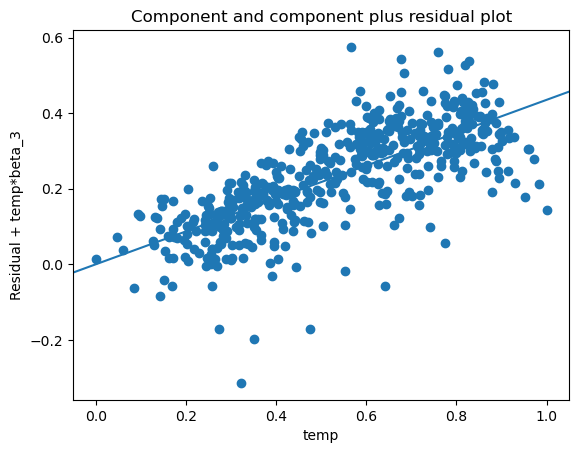

In [83]:
# Validating Linear Relationship

sm.graphics.plot_ccpr(lr_model_12, 'temp')
plt.show()

The partial residual plot illustrates the relationship between the predictor and the dependent variable, accounting for all other variables. As shown in the graph above, this relationship demonstrates a strong adherence to linearity.

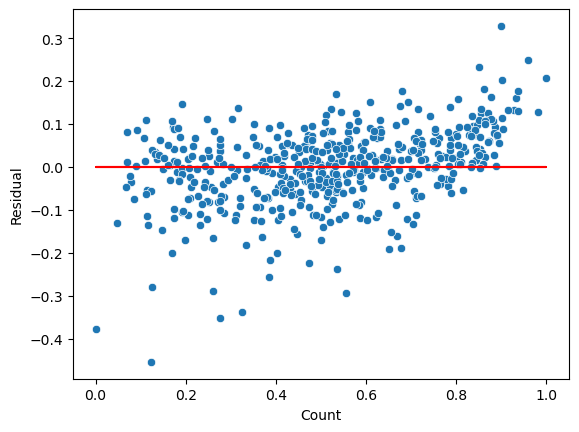

In [85]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable

y_train_pred = lr_model_12.predict(X_train_sm)
sns.scatterplot(x=y_train, y=(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As shown in the plot above, homoscedasticity is maintained, as the residuals display an almost constant variance.

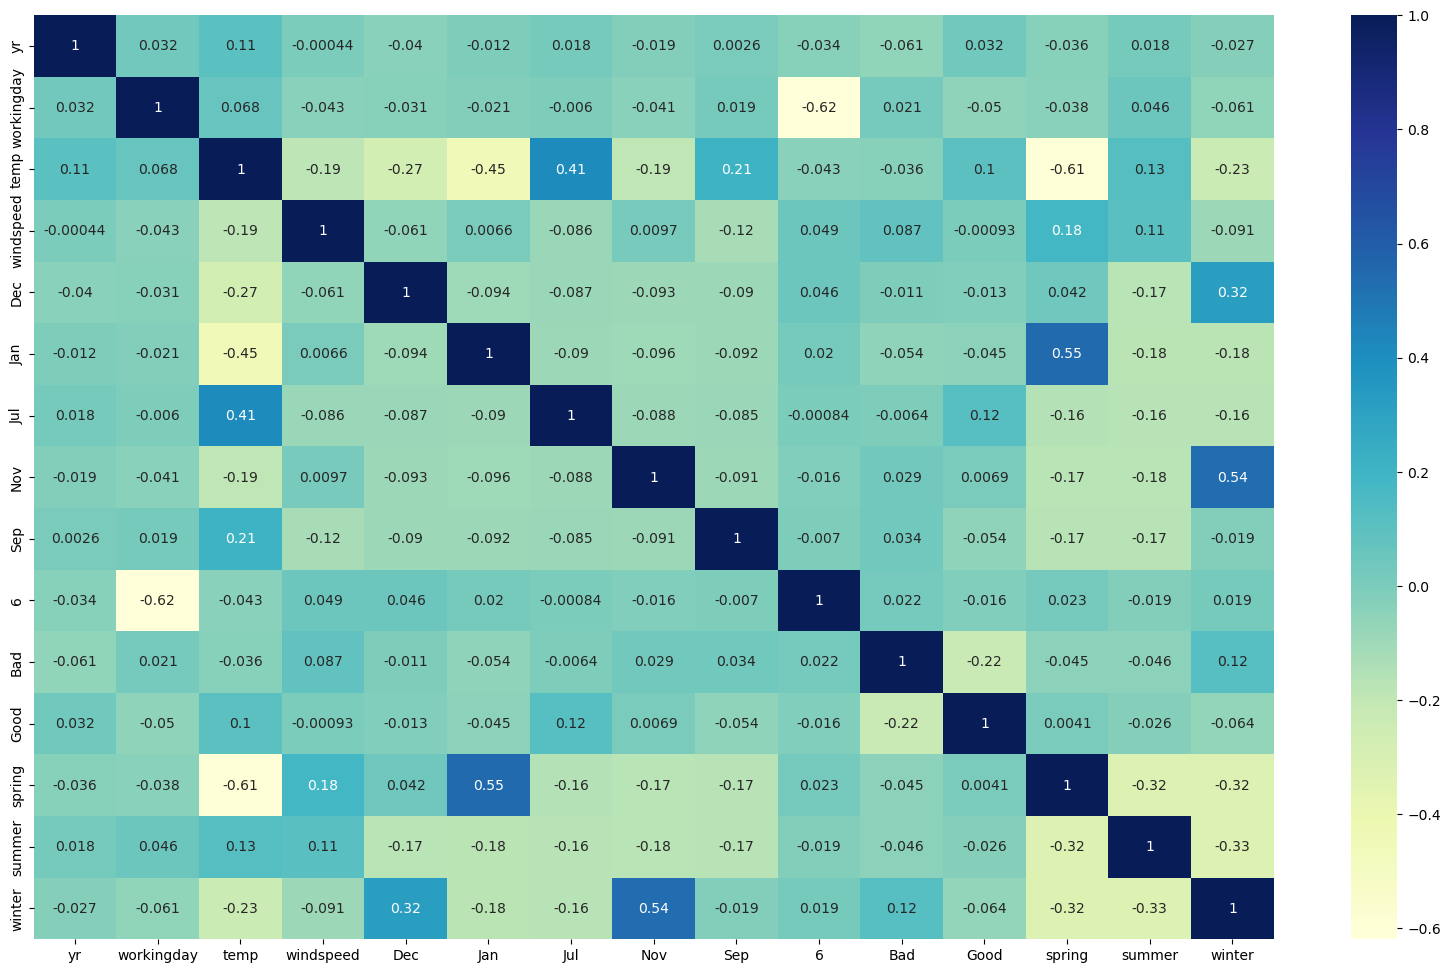

In [87]:
# Validating Multi Colinearity

plt.figure(figsize=(20,12))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

Obversations: 
- All variables have less than 0.56 correlation with eachother.

In [89]:
# VIF 

print(vif)

      Features   VIF
2         temp  7.79
3    windspeed  4.74
1   workingday  4.69
12      spring  3.21
14      winter  3.01
11        Good  2.86
13      summer  2.32
0           yr  2.08
9            6  1.85
7          Nov  1.80
5          Jan  1.66
6          Jul  1.60
4          Dec  1.49
8          Sep  1.34
10         Bad  1.12


With a maximum permissible VIF of 10 for this model, we’ve chosen to retain specific columns based on business assumptions.

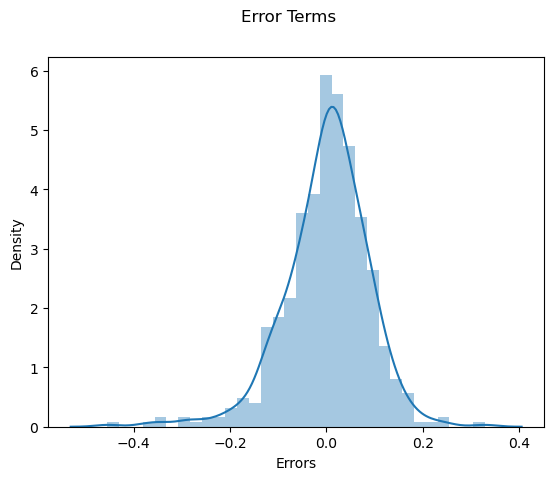

In [91]:
# Normality of Errors

y_train_pred = lr_model_12.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

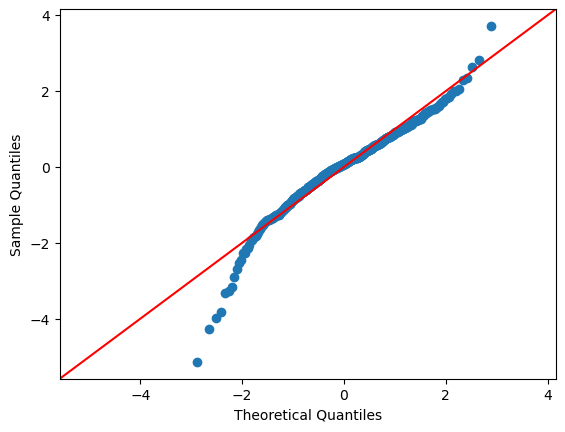

In [92]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### Step 5:  Prediction using the final model

In [94]:
# Scaling the Test Dataset with the Scaler of the Training Set

cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

In [95]:
# Seperating into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [96]:
# Adding the constant column

X_test_m_12 = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 14
X_test_m_12 = X_test_m_12.drop(['hum','Feb','Mar','May',
                              'Jun','Aug','Oct',
                              '1','2','3','4','5','holiday' ], axis=1)

In [97]:
# Making prediction using Model 12

y_test_pred = lr_model_12.predict(X_test_m_12)

### Model Evaluation

In [99]:
print('The R-squared score of the model for the predicted values is:', round(r2_score(y_test, y_test_pred), 2))
print('The Root Mean Squared Error (RMSE) of the model for the predicted values is:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))
print('The Mean Absolute Error (MAE) of the model for the predicted values is:', mean_absolute_error(y_test, y_test_pred))


The R-squared score of the model for the predicted values is: 0.82
The Root Mean Squared Error (RMSE) of the model for the predicted values is: 0.0936
The Mean Absolute Error (MAE) of the model for the predicted values is: 0.07133643549198358


In [100]:
# Determining r2 

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8168681962672557

We can see that the equation of our best fitted line developed by Model 14 is:

$ cnt = 0.1167 + ( 0.2348  \times  yr + 0.0547 \times workingday + 0.4354 \times temp -0.1609 \times windspeed -0.0713  \times season_spring + 0.0354 \times season_summer + 0.0903 \times season_winter - 0.0467 \times December -0.0526 \times January -0.0466 \times July -0.0447 \times November + 0.0652 \times September +
 0.0670 \times weekday_6 -0.2152 \times Bad Weather + 0.0818 \times Good Weather ) $



### Conclusions

Since bookings tend to increase on warmer, good-weather days, the company should focus on increasing bike availability and running promotions during the summer months to boost bookings further.

An R-squared value of 0.82 on the test data indicates that the model is a strong predictor, capturing 82% of the variance. This accuracy could be further improved by exploring other regression techniques, such as Random Forest.